In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, ggrepel, patchwork,
cowplot, ComplexHeatmap, factoextra, FactoMineR, VIM, missMDA)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Plotting_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [ ]:
# h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [5]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))
soc_good <- readr::read_rds(paste0(datapath,"soc_good_with_baseregimen.rds"))

In [50]:
meta_div_pbmc <- meta_div[ meta_div$sampletype == "PBMC",]
meta_div_cfdna <- meta_div[ meta_div$sampletype == "cfDNA",]

In [51]:
meta_div_pbmc$cfShannon <- meta_div_cfdna$observed_Shannon[match(meta_div_pbmc$sample_id, meta_div_cfdna$sample_id)]

PCA

In [52]:
cols_flow <- c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')
cols_others <- c("observed_Shannon", "cfShannon")

In [53]:
meta_div_pbmc$cyclenum <- as.numeric(gsub("X0", "", meta_div_pbmc$cycle))

In [54]:
mymat <- meta_div_pbmc[, c(cols_flow, cols_others)]

In [55]:
rownames(mymat) <- meta_div_pbmc[["sample_id"]]
# remove rows with all NAs
mymat <- mymat[rowSums(is.na(mymat)) != ncol(mymat), ]
# rmeove those with only 0s and NAs
mymat <- mymat[rowSums(mymat, na.rm = TRUE) != 0, ]

In [56]:
# meta_div_pbmc <- meta_div_pbmc[meta_div_pbmc$sample_id %in% rownames(mymat), ]

In [57]:
mymat_narm <- mymat[rowSums(is.na(mymat)) == 0, ]

In [58]:
# myvars <- sort(Rfast::colVars(mymat_narm), decreasing = TRUE)
# mymat_narm <- mymat_narm[, names(myvars)[myvars > 0]]

In [59]:
df_narm <- meta_div_pbmc[ meta_div_pbmc$sample_id %in% rownames(mymat_narm), ]

In [60]:
head(meta_div_pbmc)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SE_Simpson,basename,file,sampletype,Group,log10shann,sample_id_sampletype,assay,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
302,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,NA,NA,...,1.4124967,CHP_319-05-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,PBMC,CHP,1.074759,CHP_319_05_PBMC,capTCR-seq,NA,5
320,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,NA,NA,...,0.6519925,CHP_323-03-PBMC-DNA,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,PBMC,CHP,1.576594,CHP_323_03_PBMC,capTCR-seq,43.423179,3
322,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,NA,NA,...,2.5682322,CHP_323-05-PBMC-DNA,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,PBMC,CHP,1.912506,CHP_323_05_PBMC,capTCR-seq,8.670523,5
327,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,NA,NA,...,0.8277409,CHP_324-05_PBMC-DNA,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,PBMC,CHP,2.113672,CHP_324_05_PBMC,capTCR-seq,1.774633,5
346,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,NA,NA,...,0.6027653,CHP-328-04-PBMC-DNA,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt,PBMC,CHP,2.349758,CHP_328_04_PBMC,capTCR-seq,NA,4
347,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,NA,NA,...,0.6607808,CHP-328-05-PBMC-DNA,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,PBMC,CHP,1.941117,CHP_328_05_PBMC,capTCR-seq,3.064842,5


In [61]:
dim(df_narm)

[1] 75 70

In [62]:
table(df_narm$Relapse)


 0  1 
61 14 

In [63]:
dim(mymat_narm)

[1] 75 11

In [64]:
dim(mymat)

[1] 326  11

In [27]:
# # Get median of mymat_narm columns for each cancergroup using df_narm
# medians <- apply(mymat_narm, 2, function(x) tapply(x, df_narm$cancergroup, median, na.rm = TRUE))
# mads <- apply(mymat_narm, 2, function(x) tapply(x, df_narm$cancergroup, mad, na.rm = TRUE))

In [30]:
# scale each column by the median of the cancergroup in medians
# mymat_narm_scaled <- mymat_narm
# for(i in 1:nrow(mymat_narm)){
#   mymat_narm_scaled[i, ] <- mymat_narm[i, ]/medians[df_narm$cancergroup[i], ]#/ mads[df_narm$cancergroup[i], ]
# }

In [65]:
colnames(mymat_narm)[colnames(mymat_narm) == "observed_Shannon"] <- "TCR Diversity"
colnames(mymat_narm)[colnames(mymat_narm) == "cfShannon"] <- "cfTCR Diversity"

In [66]:
set.seed(123)
pca <- prcomp(mymat_narm, center = T, scale. = T)

In [67]:
p1 <- fviz_pca_ind(pca,
     col.ind = as.vector(df_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE, mean.point = FALSE
)

In [34]:
# flip the first PC
# pca$rotation[,1] <- -pca$rotation[,1]

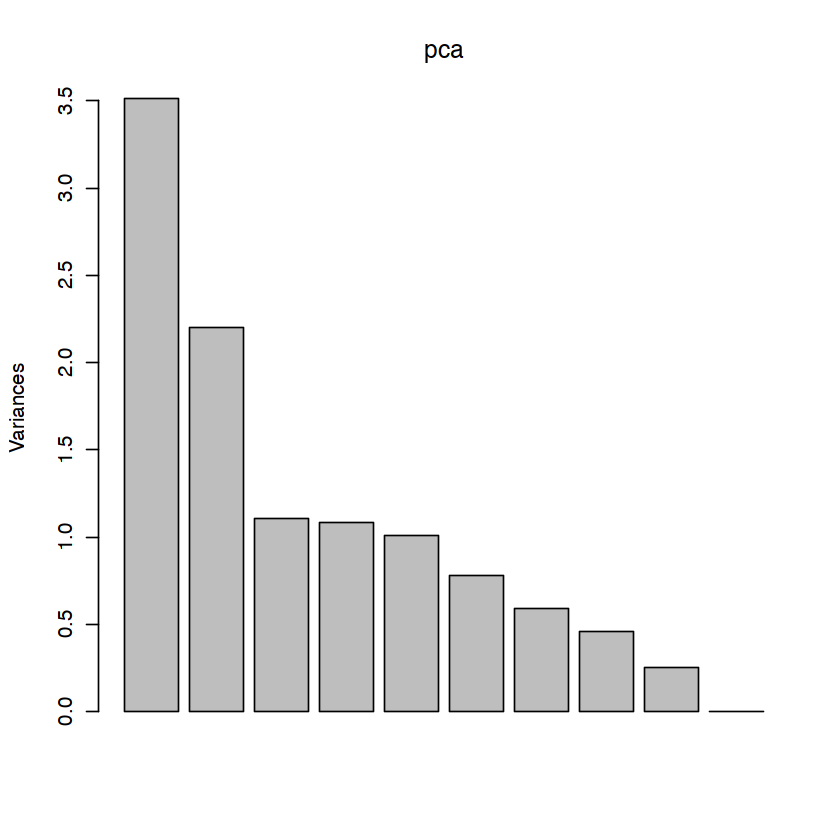

In [68]:
screeplot(pca)

varplot

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


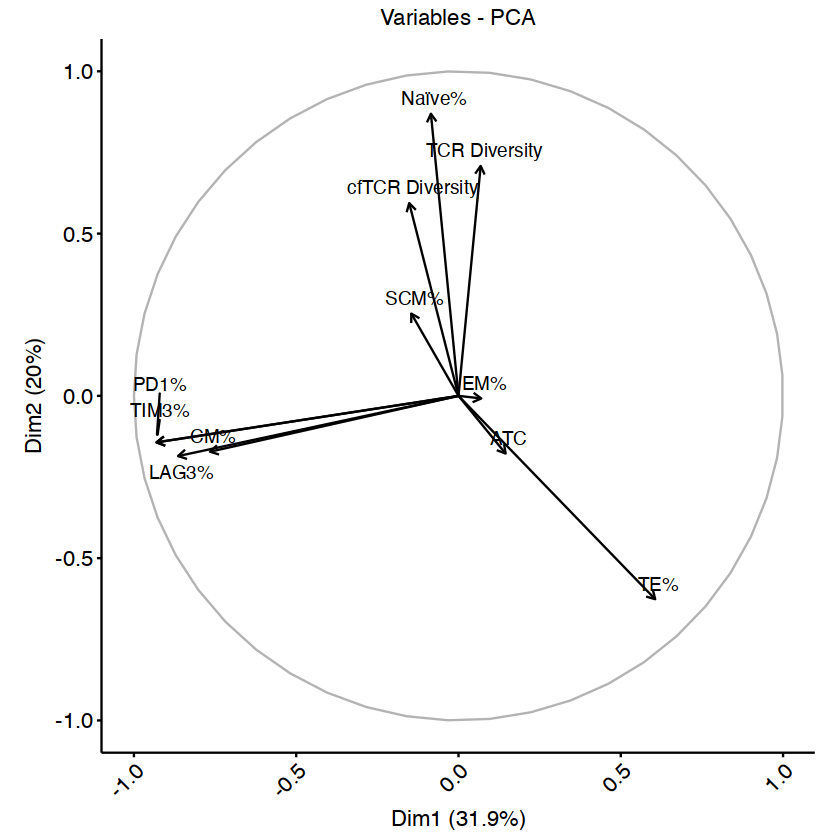

In [69]:
p2 <- fviz_pca_var(pca, repel = F, geom = "arrow", axes.linetype = NA) +
    geom_text_repel(aes(label = rownames(pca$rotation)),
        point.padding = unit(0.5, "lines"),
        min.segment.length = unit(0, "lines"),
        nudge_x = 0.01, nudge_y = 0.01,
        direction = "y"
    ) + myaxis + myplot

p2

In [70]:
pdf(paste0(plotpath, "PCAvarplot.pdf"), width = 7, height = 7)
p2
dev.off()


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


pdf 
  2

biplot

In [72]:
df_narm$prepost <- NA
df_narm$prepost[ df_narm$cycle == "X01"] <- "Pre-therapy"
df_narm$prepost[ df_narm$cycle != "X01"] <- "Post-therapy"

In [73]:
table(df_narm$prepost)


Post-therapy  Pre-therapy 
          51           24 

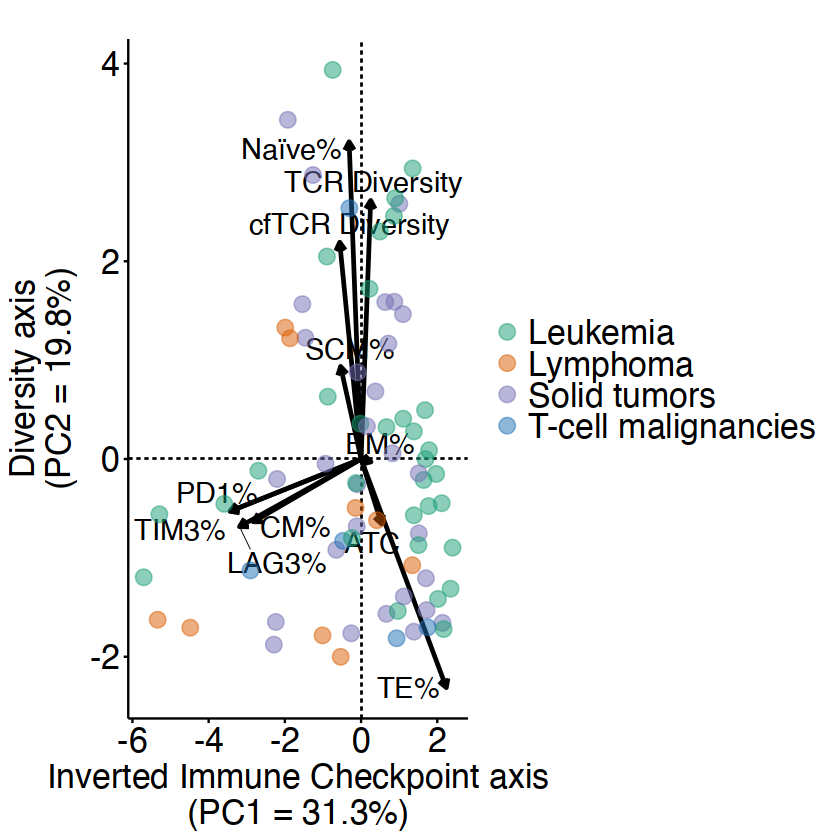

In [74]:
p3 <- fviz_pca_biplot(pca,
    geom.var = c("arrow", "text"),
    geom.ind = "point",
    alpha.ind = 0, alpha.var = 1,
    # col.ind = df_narm$cancergroup,
    # shape.ind = df_narm$prepost,
    col.var = "black",
    repel = TRUE,
    labelsize = 6,
    arrowsize = 1,
    addEllipses = FALSE, 
    mean.point = FALSE,
    title = "") +
    geom_point(aes(colour = df_narm$cancergroup), size = 4, alpha = 0.5) +
    scale_color_manual(values = group_col) + myplot + myaxis +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size = 20), 
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 20)) 
# increase size of the legends
p3 <- p3 + theme(legend.text = element_text(size = 20), legend.title = element_blank())
p3 <- p3 + labs(x = "Inverted Immune Checkpoint axis\n(PC1 = 31.3%)", y = "Diversity axis\n(PC2 = 19.8%)")

p3


In [75]:
pdf(paste0(plotpath, "PCAbiplot.pdf"), width = 7, height = 7)
cowplot::plot_grid(p3 + theme(legend.position = "none"), labels = "A")
dev.off()

pdf 
  2

In [76]:
pdf(paste0(plotpath, "PCAbiplot_lgd.pdf"), width = 5, height = 5)
grid.draw(get_legend(p3 + theme(legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black")))) 
dev.off()

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


pdf 
  2

In [77]:
df_narm$Dim1 <- pca$x[,1][match( df_narm$sample_id, rownames(pca$x))]
df_narm$Dim2 <- pca$x[,2][match( df_narm$sample_id, rownames(pca$x))]

In [78]:
table(df_narm$Patient[df_narm$Relapse == 1])


CHP_349 CHP_353 CHP_356 CHP_364 CHP_368 CHP_390 CHP_395 CHP_411 CHP_413 CHP_418 
      1       2       2       2       1       1       1       1       2       1 

In [79]:
mydist <- as.matrix(dist(pca$x[,1:2])) 

In [80]:
head(mydist)

,CHP_343_02,CHP_343_04,CHP_347_02,CHP_347_03,CHP_347_04,CHP_347_05,CHP_348_01,CHP_349_01,CHP_350_02,CHP_350_03,...,CHP_408_02,CHP_408_03,CHP_409_02,CHP_410_01,CHP_411_02,CHP_413_01,CHP_413_02,CHP_415_03,CHP_418_02,CHP_419_02
CHP_343_02,0.000000,2.033375,3.517412,2.939903,5.476275,2.645576,2.119615,2.3022199,4.523645,3.539550,...,1.843332,4.742653,0.9434025,2.756793,5.719563,1.242989,2.029608,1.743928,1.428213,1.9904103
CHP_343_04,2.033375,0.000000,4.387430,1.805179,3.483962,4.671354,3.667371,4.3307005,5.541977,4.693094,...,2.276322,4.859770,2.9691561,4.522199,6.014660,3.270214,3.897646,3.720021,3.443590,4.0218687
CHP_347_02,3.517412,4.387430,0.000000,3.448319,6.605343,3.705521,1.770682,3.6152075,1.162241,0.665478,...,2.113024,1.876121,3.3176097,2.260376,2.415648,3.342600,2.568813,3.012852,3.240025,3.5785959
CHP_347_03,2.939903,1.805179,3.448319,0.000000,3.196834,5.183195,3.526521,4.8880635,4.579067,3.956985,...,1.762848,3.317359,3.6582705,4.484083,4.499249,3.924740,4.103262,4.150625,4.022468,4.6333508
CHP_347_04,5.476275,3.483962,6.605343,3.196834,0.000000,8.054561,6.651172,7.7258131,7.698609,7.144449,...,4.907432,6.025394,6.3802456,7.598509,7.137281,6.677904,7.115919,7.050014,6.828540,7.4308591
CHP_347_05,2.645576,4.671354,3.705521,5.183195,8.054561,0.000000,2.047620,0.3467957,4.119289,3.256256,...,3.517518,5.526188,1.7032809,1.510451,6.091848,1.402737,1.218217,1.032570,1.230495,0.6664529


In [81]:
# order df_narm
df_narm <- df_narm %>%
    group_by(Patient) %>%
    # order cyclenum
    arrange(cyclenum) %>%
    ungroup()
pts <- names(which(table(df_narm$Patient) > 1))

In [82]:
dim(df_narm)

[1] 75 73

In [83]:
df_narm$Dim1 <- pca$x[,1][match( df_narm$sample_id, rownames(pca$x))]
df_narm$Dim2 <- pca$x[,2][match( df_narm$sample_id, rownames(pca$x))]

In [84]:
df_narm$dist <- NA
df_narm$quantreg <- NA

In [85]:
for (i in pts) {
    tmp <- df_narm[df_narm$Patient == i, ]

# quantreg
tmp <- tmp %>% mutate(quantreg_n = quantreg::rq(Dim2 ~ Dim1, tau = 0.5)$coef[2] / n())
# tmp <- tmp %>% mutate(quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau = 0.5)$coef[2] / n())
# tmp <- tmp %>% mutate(quantreg_n2 = quantreg::rq(Dim2 ~ cyclenum, tau = 0.5)$coef[2] / n())
    # distances
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    df_narm$dist[df_narm$Patient == i] <- tmp$dist
    df_narm$quantreg[df_narm$Patient == i] <- tmp$quantreg_n

}


In [86]:
mydist[tmp$sample_id, tmp$sample_id]

,CHP_413_01,CHP_413_02
CHP_413_01,0.000000,1.054903
CHP_413_02,1.054903,0.000000


In [87]:
allpts <- as.data.frame(table(df_narm$Patient), stringsAsFactors = F)
df_narm$dist[df_narm$dist == 0] <- NA

allpts$sumdist <- NA
allpts$meddist <- NA
allpts$samplecount <- NA

for (i in 1:nrow(allpts)) {
    tmp <- as.data.frame(df_narm[df_narm$Patient == allpts$Var1[i], ])
    allpts$sumdist[i] <- sum(tmp[tmp$dist != 0, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[tmp$dist != 0, "dist"], na.rm = T)
    # count number of samples for meddist
    allpts$samplecount[i] <- nrow(tmp[!is.na(tmp$dist), ]) + 1 # add 1 for the first sample, this is the number of samples with a distance
}

allpts$sumdist_n <- allpts$sumdist / allpts$samplecount
allpts$meddist_n <- allpts$meddist / allpts$samplecount
allpts_no0 <- allpts[allpts$sumdist_n > 0, ]
allpts_no0 <- allpts_no0[allpts_no0$Freq > 1, ]

mysample_df <- df_narm[df_narm$Patient %in% allpts_no0$Var1, ]
mypatients <- mysample_df[!duplicated(mysample_df$Patient), ]
mypatients$meddist_n <- allpts_no0$meddist_n[match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist <- allpts_no0$meddist[match(mypatients$Patient, allpts_no0$Var1)]


In [88]:
dim(mypatients)

[1] 11 77

In [89]:
df_narm$meddist_n <- mypatients$meddist_n[match(df_narm$Patient, mypatients$Patient)]

In [90]:
dim(df_narm)

[1] 75 76

In [92]:
summary(mypatients$meddist_n)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4995  0.5524  0.8621  0.8908  1.0365  1.9215 

In [93]:
table(mypatients$Relapse)


 0  1 
10  1 

In [94]:
table(df_narm$Patient)


CHP_343 CHP_347 CHP_348 CHP_349 CHP_350 CHP_351 CHP_353 CHP_356 CHP_357 CHP_358 
      2       4       1       1       2       1       2       2       5       2 
CHP_361 CHP_362 CHP_363 CHP_364 CHP_368 CHP_370 CHP_371 CHP_372 CHP_373 CHP_375 
      3       3       1       2       1       1       1       1       1       1 
CHP_378 CHP_381 CHP_383 CHP_385 CHP_387 CHP_390 CHP_391 CHP_393 CHP_394 CHP_395 
      2       1       2       1       2       1       1       1       1       1 
CHP_396 CHP_397 CHP_398 CHP_399 CHP_400 CHP_403 CHP_404 CHP_405 CHP_407 CHP_408 
      2       1       1       3       1       1       1       3       1       3 
CHP_409 CHP_410 CHP_411 CHP_413 CHP_415 CHP_418 CHP_419 
      1       1       1       2       1       1       1 

In [95]:
# get median meddist_n for each disease_type
medians <- tapply(mypatients$meddist_n, mypatients$Disease_type, median, na.rm = T)

In [96]:
mypatients_order <- mypatients
mypatients_order$Disease_type <- factor(mypatients_order$Disease_type, levels = names(sort(medians)))

In [97]:
# botplot and point plot using ggplot2 y axis is meddist_n, x axis is Disease_type
p4 <- ggplot(data = mypatients_order, aes(x = Disease_type, y = meddist_n)) +
    geom_point( size = 3, alpha = 0.5) +
    myplot + myaxis 

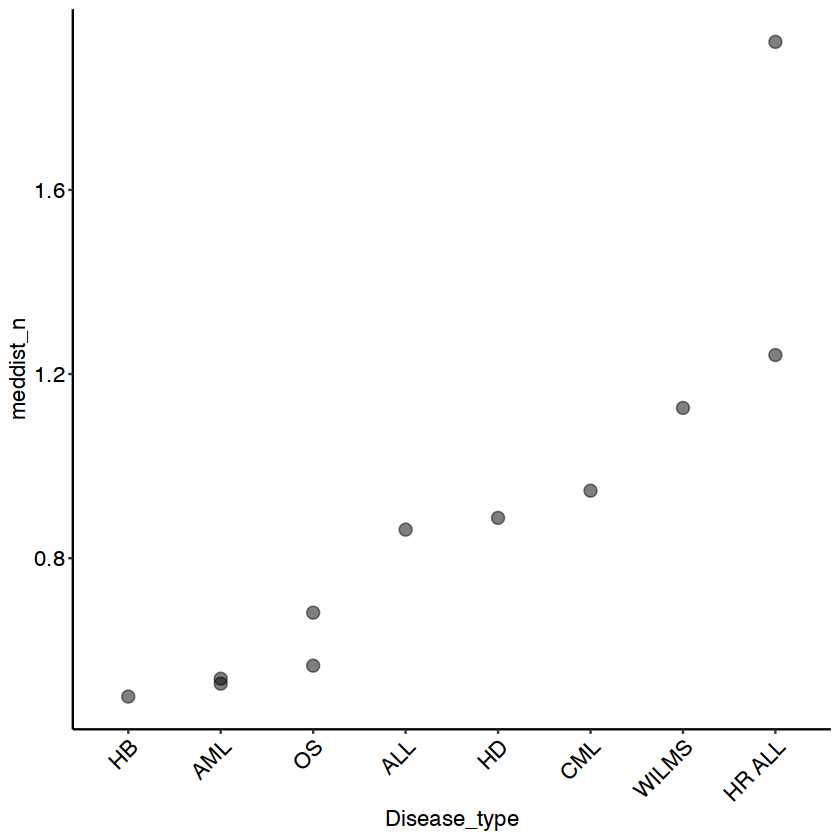

In [98]:
p4

In [99]:
for (i in mypatients$Patient[ mypatients$Relapse == 1]) {
    df_narm$alpha <- NA
    df_narm$alpha[df_narm$Patient == i] <- 1
    df_narm$alpha[df_narm$Patient != i] <- 0.4
    pdf(paste0(plotpath, "PCAplot_", i, "relapsed.pdf"))
    print(dimplot_pt(df_narm, i, "cancergroup", "alpha") +
        ggtitle(paste0(
            i, " Relapsed ", mypatients$Disease_type[mypatients$Patient == i], "\n",
            "Score: ", mypatients$meddist_n[mypatients$Patient == i]
        )))
    dev.off()
}


In [100]:
dimplot_pt1 <- function (df, pt, myshape, myalpha) 
{
    p1 <- ggplot(data = df, aes(x = Dim1, y = Dim2)) + 
        geom_point(aes(color = cancergroup, alpha = eval(parse(text = myalpha))), 
            size = 3) + geom_path(data = df[df$Patient == pt, 
        ], aes(group = Patient), arrow = arrow(length = unit(0.3, 
        "cm"), ends = "last", type = "closed")) + myplot + myaxis + 
        theme(axis.text.x = element_text(angle = 0, hjust = 0.5),
        legend.position = "none") + 
        scale_color_manual(values = group_col) + geom_hline(yintercept = 0, 
        linetype = "dashed") + geom_vline(xintercept = 0, linetype = "dashed") + 
        ggtitle(pt)
    return(p1)
}

In [101]:
for (i in mypatients$Patient[ mypatients$Relapse == 0]) {
    df_narm$alpha <- NA
    df_narm$alpha[df_narm$Patient == i] <- 1
    df_narm$alpha[df_narm$Patient != i] <- 0.4
    pdf(paste0(plotpath, "PCAplot_", i, "Norelapse.pdf"))
    print(dimplot_pt(df_narm, i, "cancergroup", "alpha") +
        ggtitle(paste0(
            i, "No Relapse ", mypatients$Disease_type[mypatients$Patient == i], "\n",
            "Score: ", mypatients$meddist_n[mypatients$Patient == i]
        )))
    dev.off()
}


In [68]:
# for (i in mypatients$Patient[ mypatients$Relapse == 0]) {
#     df_narm$alpha <- NA
#     df_narm$alpha[df_narm$Patient == i] <- 1
#     df_narm$alpha[df_narm$Patient != i] <- 1
#     pdf(paste0(plotpath, "PCAplot_", i, "Norelapse.pdf"),
#     width = 5, height = 5)
#     print(dimplot_pt1(df_narm, i, "cancergroup", "alpha") +
#         ggtitle(paste0(
#             i, "No Relapse ", mypatients$Disease_type[mypatients$Patient == i], "\n",
#             "Score: ", mypatients$meddist_n[mypatients$Patient == i]
#         )))
#     dev.off()
# }


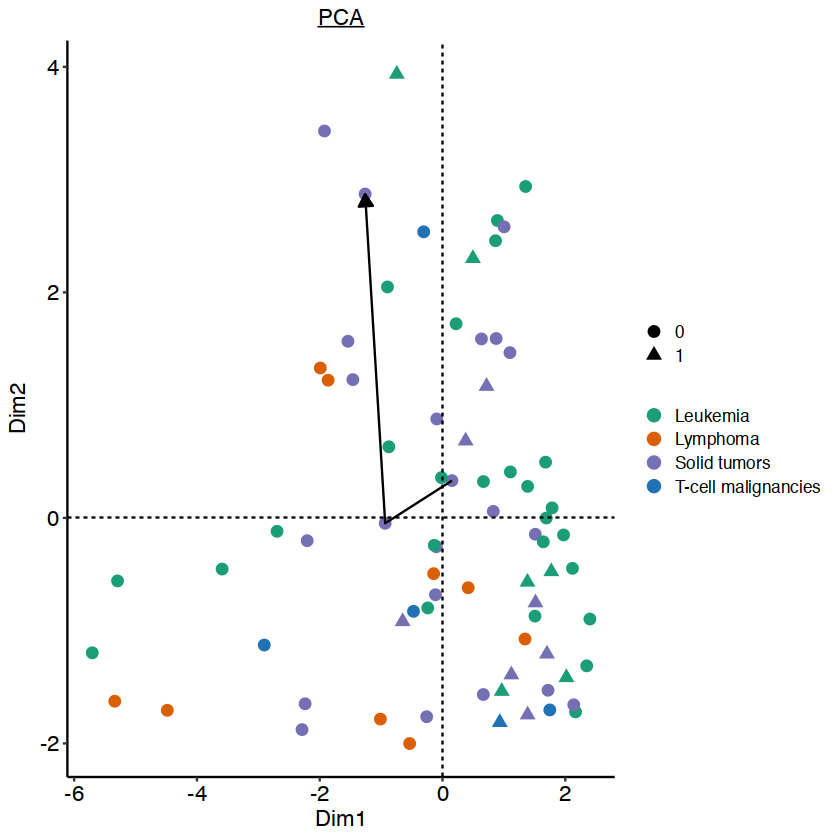

In [103]:
ggplot(data = df_narm, aes(x = Dim1, y = Dim2, shape = as.factor(Relapse))) +
    geom_point(aes(color = cancergroup), alpha = 1, size = 3) +
    geom_path(
        data = df_narm[df_narm$Patient %in% c("CHP_408"), ], aes(group = Patient), # color = c("red", "black"),
        arrow = arrow(length = unit(0.30, "cm"), ends = "last", type = "closed")
    ) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
    scale_color_manual(values = group_col) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    geom_vline(xintercept = 0, linetype = "dashed") +
    ggtitle(expression(underline("PCA")))

Score Dims, generate spiderplots

In [70]:
head(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,alpha
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.41014023,0.5434345,0.4
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,1.890,1,Pre-therapy,1.9604253,-1.45183248,NA,NA,NA,0.4
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,4.170,1,Pre-therapy,1.7184050,-0.55029920,NA,-1.38092546,NA,0.4
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.01577622,0.5205460,0.4
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.26847373,0.8817865,0.4
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.02783916,0.5595812,0.4


In [71]:
round(pca$rotation[,1],3)
round(pca$rotation[,2],3)

ATC          Naïve%            SCM%             CM%             EM% 
          0.088          -0.001          -0.059          -0.447           0.038 
            TE%            PD1%           LAG3%           TIM3%   TCR Diversity 
          0.316          -0.506          -0.410          -0.506           0.079 
cfTCR Diversity 
         -0.043

ATC          Naïve%            SCM%             CM%             EM% 
         -0.089           0.592           0.193          -0.066          -0.014 
            TE%            PD1%           LAG3%           TIM3%   TCR Diversity 
         -0.451          -0.073          -0.099          -0.073           0.455 
cfTCR Diversity 
          0.410

SPiderplot

In [72]:
diff_Dim1 <- calculate_delta.fx(df_narm, "cycle", "Dim1")
diff_Dim2 <- calculate_delta.fx(df_narm, "cycle", "Dim2")

In [73]:
head(diff_Dim1)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,alpha,Difference
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.41014023,0.5434345,0.4,0
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,4.170,1,Pre-therapy,1.7184050,-0.55029920,NA,-1.38092546,NA,0.4,0
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.01577622,0.5205460,0.4,0
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.26847373,0.8817865,0.4,0
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.02783916,0.5595812,0.4,0
CHP_378_01,CHP_378,X01,28.9,0.00,1,ALL,28.9,2239,374,...,19.174,1,Pre-therapy,1.1010164,2.61121587,NA,-20.92531692,NA,0.4,0


In [74]:
myformula <- as.formula(paste0("Difference", " ~ cycle + Age + cancergroup + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = diff_Dim1) # keep cycle as categorical
lsm <- lsmeans::lsmeans(myfit, "cycle")
as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,X02 - X01,-0.6325764,0.6442387,19.01521,-0.9818974,0.7028175
2,X03 - X01,-1.4691653,0.7608447,19.72308,-1.9309662,0.2042635
3,X04 - X01,-2.1570124,1.0098275,23.07160,-2.1360207,0.1376091
4,X05 - X01,-1.0108471,1.0146555,23.03630,-0.9962466,0.6928934


In [75]:
myformula <- as.formula(paste0("Difference", " ~ cycle + Age + cancergroup + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = diff_Dim2) # keep cycle as categorical
lsm <- lsmeans::lsmeans(myfit, "cycle")
as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))

boundary (singular) fit: see help('isSingular')



,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,X02 - X01,0.8802374,0.5751287,19.61589,1.530505,0.3796980
2,X03 - X01,0.2665902,0.6779015,20.61710,0.393258,0.9608564
3,X04 - X01,-1.0071718,0.8938150,24.43242,-1.126824,0.6126888
4,X05 - X01,1.4310630,0.8899102,23.96014,1.608098,0.3350320


In [76]:
dim(diff_Dim1)
dim(diff_Dim2)

[1]   34 8839

[1]   34 8839

In [77]:
mytab_dim1 <- as.data.frame.matrix(table(diff_Dim1$Patient, diff_Dim1$Difference < 0) )
# match cancergroup diff_Dim1 and mytab using Patient
mytab_dim1$cancergroup <- diff_Dim1$Disease_type[match(rownames(mytab_dim1), diff_Dim1$Patient)]
mytab_dim1$rel <- diff_Dim1$Relapse[match(rownames(mytab_dim1), diff_Dim1$Patient)]
mytab_dim1

,FALSE,TRUE,cancergroup,rel
,<int>,<int>,<chr>,<int>
CHP_348,1,1,OS,0
CHP_353,1,1,AML,1
CHP_357,2,3,AML,0
CHP_361,1,2,HD,0
CHP_362,1,2,OS,0
CHP_378,2,0,ALL,0
CHP_387,1,1,T-ALL,0
CHP_396,1,1,HR ALL,0
CHP_397,1,1,ALL,0


In [78]:
mytab_dim2 <- as.data.frame.matrix(table(diff_Dim2$Patient, diff_Dim2$Difference < 0) )
# match cancergroup diff_Dim1 and mytab using Patient
mytab_dim2$cancergroup <- diff_Dim2$Disease_type[match(rownames(mytab_dim2), diff_Dim2$Patient)]
mytab_dim2$rel <- diff_Dim2$Relapse[match(rownames(mytab_dim2), diff_Dim2$Patient)]
mytab_dim2

,FALSE,TRUE,cancergroup,rel
,<int>,<int>,<chr>,<int>
CHP_348,1,1,OS,0
CHP_353,2,0,AML,1
CHP_357,2,3,AML,0
CHP_361,1,2,HD,0
CHP_362,3,0,OS,0
CHP_378,1,1,ALL,0
CHP_387,2,0,T-ALL,0
CHP_396,2,0,HR ALL,0
CHP_397,2,0,ALL,0


In [79]:
mytab_dim2[ mytab_dim2$cancergroup == "AML", ]

,FALSE,TRUE,cancergroup,rel
,<int>,<int>,<chr>,<int>
CHP_353,2,0,AML,1
CHP_357,2,3,AML,0
CHP_413,2,0,AML,1


In [80]:
p_dim1 <- delta_basespiderplot.fx(diff_Dim1, "cycle", "factor(Relapse)", c("0" = "blue", "1" = "red")) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    labs( y = "Change in Inverted \nImmune Checkpoint axis") +
    theme(axis.text.x = element_blank()) 
    
p_dim2 <- delta_basespiderplot.fx(diff_Dim2, "cycle", "factor(Relapse)", c("0" = "blue", "1" = "red")) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    labs( y = "Change in \nDiversity axis") +
    scale_x_discrete(labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"))


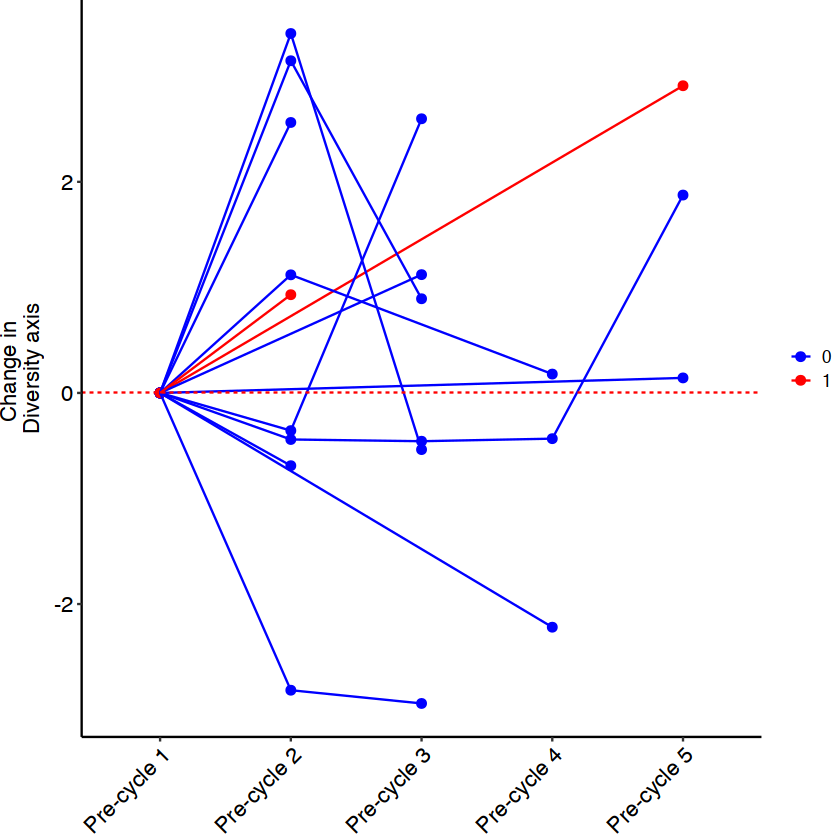

In [81]:
p_dim2

In [82]:
dim(mytab_dim2)

[1] 13  4

In [83]:
# get the last timepoint for each patient
last_timepoint <- diff_Dim1 %>%
    group_by(Patient) %>%
    filter(cycle == max(cycle)) %>% 
    ungroup()
last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle))

p_dim1_ <- p_dim1 + geom_text_repel(
    data = last_timepoint[ last_timepoint$Patient %in% rownames(mytab_dim1)[mytab_dim1$rel == 1], ],
    aes(label = Disease_type),
    hjust = "left",
    direction = "y",
    nudge_x = 3,# - last_timepoint$cycleno,
    size = 4,
    xlim = c(6, NA)
    # segment.color = NA,
)


In [84]:
last_timepoint[ last_timepoint$Relapse == 1, ]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,alpha,Difference,cycleno
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_413_02,CHP_413,X02,3.2,93.42,19,AML,3.2,2525,312,...,2,Post-therapy,1.3420137,-0.6650681,1.061385,0.9120025,0.5306924,0.4,0.5102461,2
CHP_353_05,CHP_353,X05,14.6,1180.35,6,AML,14.6,2092,513,...,5,Post-therapy,0.6646015,2.3601492,NA,-1.3809255,NA,0.4,-1.0538036,5


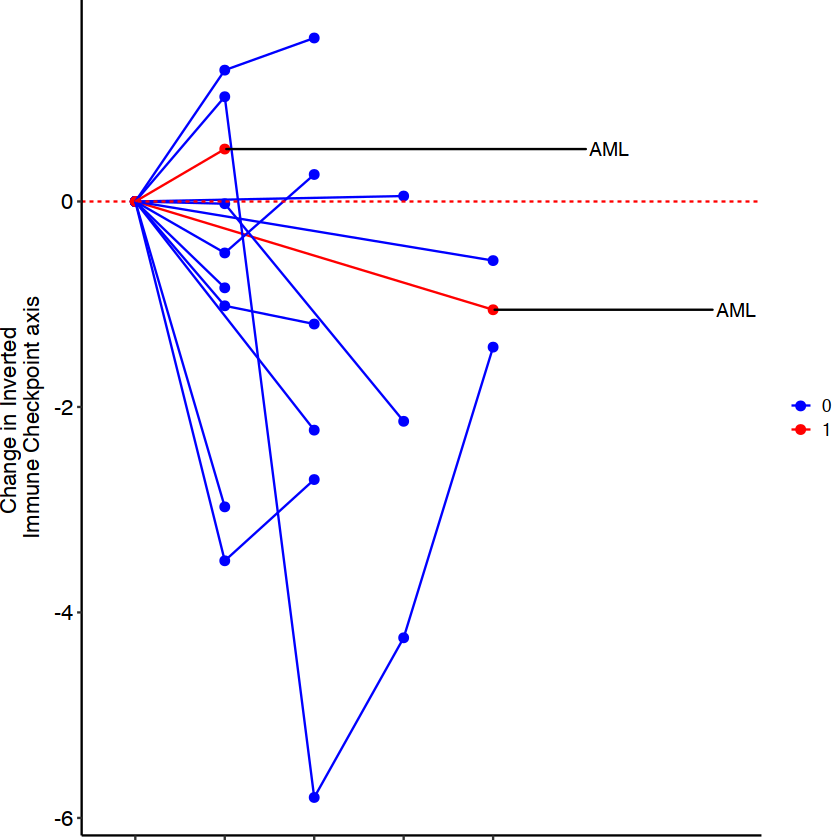

In [85]:
p_dim1_

In [86]:
# get the last timepoint for each patient
last_timepoint <- diff_Dim2 %>%
    group_by(Patient) %>%
    filter(cycle == max(cycle)) %>% 
    ungroup()
last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle))

p_dim2_ <- p_dim2 + geom_text_repel(
    data = last_timepoint[ last_timepoint$Patient %in% rownames(mytab_dim2)[mytab_dim2$rel == 1], ],
    aes(label = Disease_type),
    hjust = "left",
    direction = "y",
    nudge_x = 4 - last_timepoint$cycleno,
    size = 4,
    xlim = c(6, NA)
)


In [87]:
head(last_timepoint$Relapse)

[1] 0 0 1 0 0 0

In [88]:
summary(last_timepoint$Difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9420 -0.5366  0.8923  0.5248  1.8748  2.9104 

Warning message in x + params$x:
“longer object length is not a multiple of shorter object length”


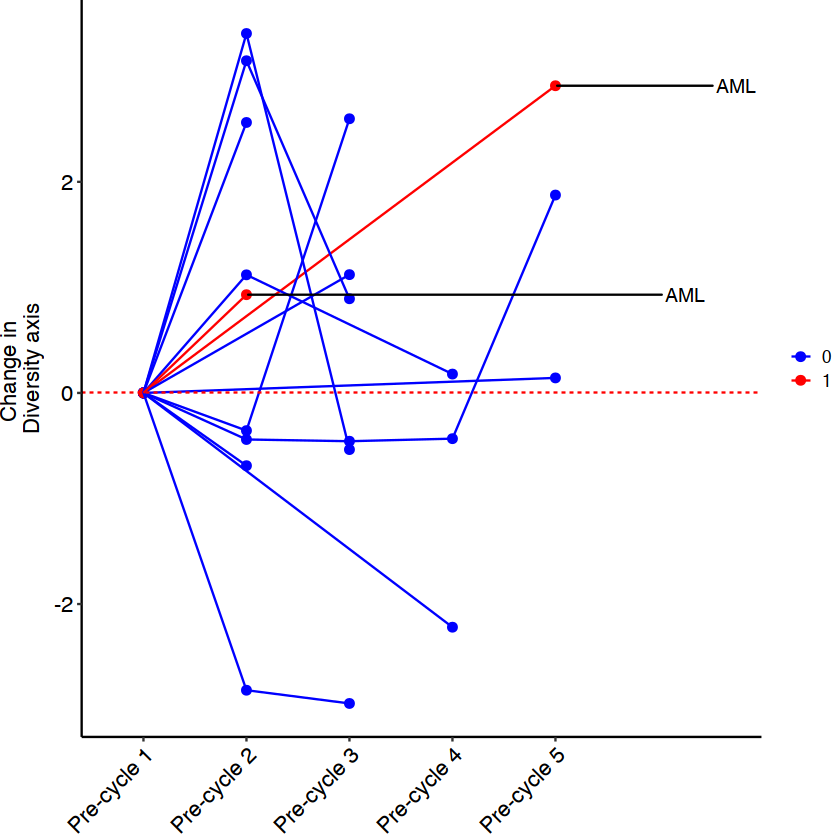

In [89]:
p_dim2_ #+ facet_wrap(~cancergroup)

In [90]:
pdf(paste0(plotpath, "diff_dim1_2.pdf"), width = 3, height = 6)
cowplot::plot_grid((p_dim1_ + theme(legend.position = "none") )/ (p_dim2_ + theme(legend.position = "none") ), labels = "B")
dev.off()

Warning message in x + params$x:
“longer object length is not a multiple of shorter object length”


pdf 
  2

In [91]:
pdf(paste0(plotpath, "diff_dim1_lgd.pdf"), width = 5, height = 5)
grid.draw(get_legend(p_dim1 + scale_color_discrete(labels=c('Relapsed', 'No Relapse')))) 
dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


pdf 
  2

In [92]:
# diff_dim1_dim2 <- merge(diff_Dim1, diff_Dim2[,c("sample_id", "Difference")], by = "sample_id")

In [93]:
# diff_dim1_dim2

### S plot

In [94]:
# mypatients_df1 <- mypatients

In [109]:
head(mypatients)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,EMPTY1,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,-1.0000000,NA
NA,NA,NA,NA,NA,NA,EMPTY2,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,-1.0000000,NA
NA,NA,NA,NA,NA,NA,EMPTY3,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,-1.0000000,NA
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.41014023,0.5434345,1.086869
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.01577622,0.5205460,2.602730
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.26847373,0.8817865,2.645359


In [96]:
# Add placeholders
mypatients <- rbind(NA, NA, NA, mypatients)
mypatients[1, "Disease_type"] <- "EMPTY1"
mypatients[2, "Disease_type"] <- "EMPTY2"
mypatients[3, "Disease_type"] <- "EMPTY3"
mypatients[1, "meddist_n"] <- -1
mypatients[2, "meddist_n"] <- -1
mypatients[3, "meddist_n"] <- -1
mypatients[1, "cancergroup"] <- "Lymphoma"
mypatients[2, "cancergroup"] <- "Solid tumors"
mypatients[3, "cancergroup"] <- "T-cell malignancies"

In [97]:
mymed <- median.cohorts.fx(mypatients, "meddist_n", "Disease_type")
# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- mypatients$cancergroup[match(mymed$group, mypatients$Disease_type)]

In [98]:
# order by cnacergroup then by median
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [99]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
5,AML,0.5256192,Leukemia
10,ALL,0.8542161,Leukemia
8,CML,0.9455732,Leukemia
7,HR ALL,1.6025093,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
6,HD,0.8817865,Lymphoma
12,DLBCL,1.9002186,Lymphoma
2,EMPTY2,-1.0000000,Solid tumors
11,HB,0.5152113,Solid tumors


In [101]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
5,AML,0.5256192,Leukemia
10,ALL,0.8542161,Leukemia
8,CML,0.9455732,Leukemia
7,HR ALL,1.6025093,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
6,HD,0.8817865,Lymphoma
12,DLBCL,1.9002186,Lymphoma
2,EMPTY2,-1.0000000,Solid tumors
11,HB,0.5152113,Solid tumors


Sort df

In [108]:
mypatients

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,EMPTY1,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,-1.0000000,NA
NA,NA,NA,NA,NA,NA,EMPTY2,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,-1.0000000,NA
NA,NA,NA,NA,NA,NA,EMPTY3,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,-1.0000000,NA
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.410140228,0.5434345,1.086869
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.015776224,0.5205460,2.602730
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.268473732,0.8817865,2.645359
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.027839162,0.5595812,1.119162
CHP_396_01,CHP_396,X01,1.1,6767.11,1,HR ALL,1.1,2481,0,...,0,1.000,1,Pre-therapy,2.2872502,-1.76655966,NA,-0.431051844,1.9621739,3.924348
CHP_399_01,CHP_399,X01,7.1,622.20,2,HR ALL,7.1,2389,0,...,0,10.170,1,Pre-therapy,2.0640090,-0.53064758,NA,-1.720621346,1.2428448,3.728534


In [102]:
sorted.df.lst <- sort.df.fx(mypatients, mymed, "meddist_n", "Disease_type")

Color dummy entries white

In [103]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [104]:
Sp <- Splot.fx(sorted.df.lst, "meddist_n", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


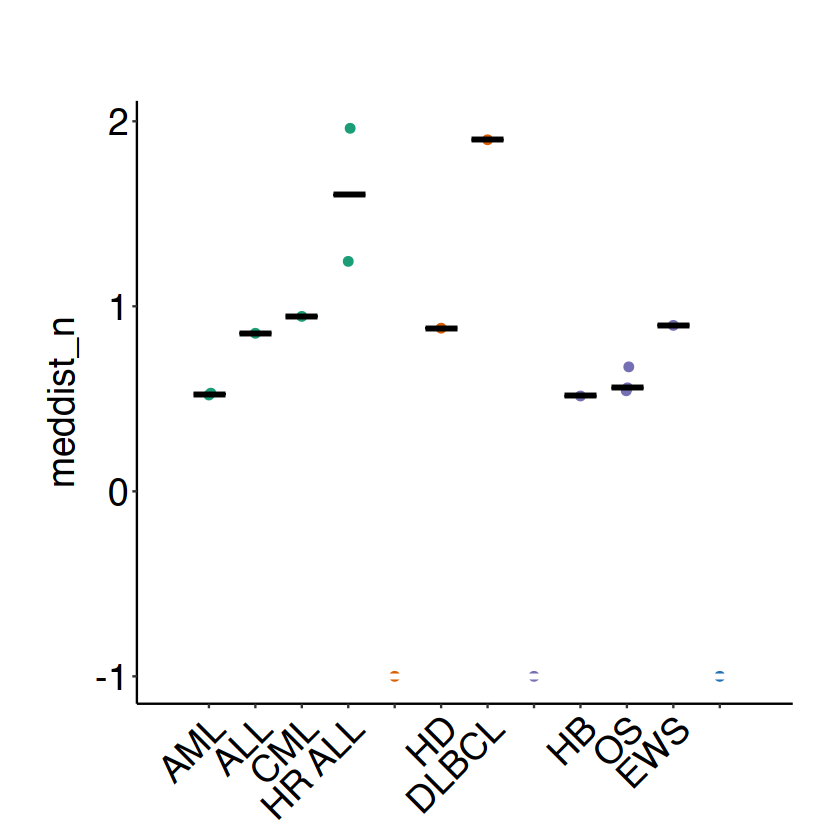

In [105]:
Sp

In [106]:
Sp1 <- Sp + ylim(c(0, 5)) + theme(plot.margin = unit(c(0, 0, 0,0), "cm"),
axis.text = element_text(size = 16, color = "black"), 
axis.title = element_text(size = 16)) + ylab("Dynamic Immunogenomic Score (TIS)")

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


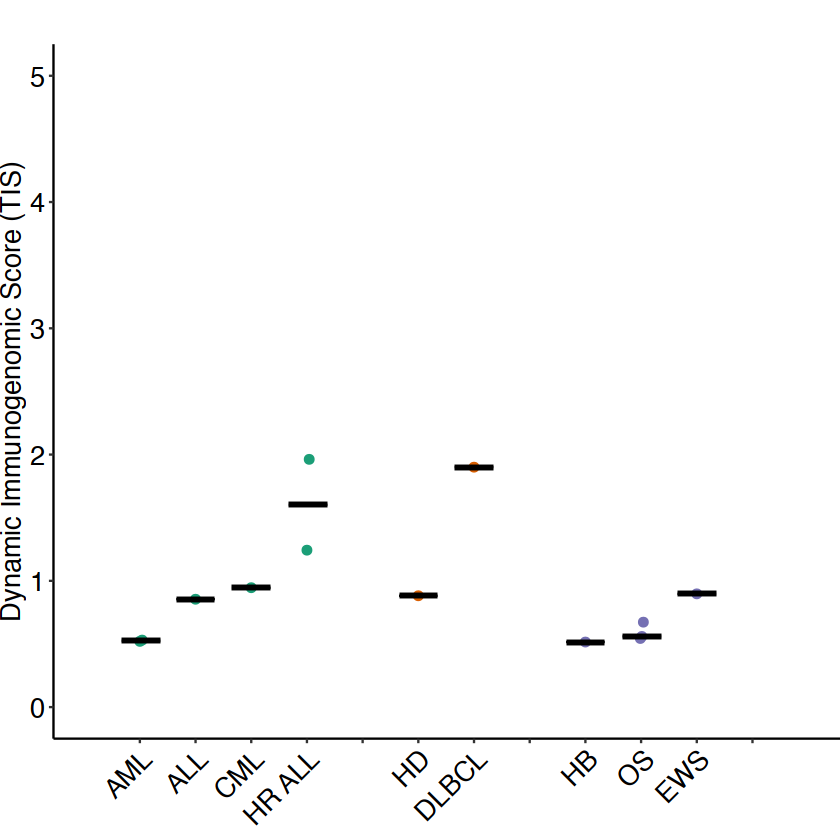

In [107]:
Sp1

In [ ]:
pdf(paste0(plotpath, "TIS.pdf"), width = 7.5, height = 6)
cowplot::plot_grid(Sp1, labels = "C") 
dev.off()

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

Stats

In [96]:
# p5 <- ggplot(diff_dim1_dim2, aes(x = Difference.x, y = Difference.y, color = cancergroup)) +
#     geom_point() +
#     # geom_text_repel(aes(label = Relapse), size = 3) +
#     geom_line(aes(group = Patient, color = cancergroup)) +
#     myplot +
#     myaxis +
#     theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
#     scale_color_manual(values = group_col) +
#     geom_hline(yintercept = 0, linetype = "dashed") +
#     geom_vline(xintercept = 0, linetype = "dashed") +
#     labs(x = "Change in Immune Checkpoint axis", y = "Change in Diversity axis")


In [98]:
# p5

In [99]:
# pdf(paste0(plotpath, "spider_dim1_dim2.pdf"), width = 5, height = 5)
# p5 + theme(legend.position = "none")
# dev.off()

# Impute with missMDA

In [61]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,NA,5
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,43.423,3
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,8.671,5
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,1.775,5
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,NA,4
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,3.065,5


In [62]:
head(mymat)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,11.878,NA
CHP_323_03,786.24,NA,NA,NA,NA,NA,NA,NA,NA,37.722,43.423
CHP_323_05,979.50,NA,NA,NA,NA,NA,NA,NA,NA,81.753,8.671
CHP_324_05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,129.919,1.775
CHP_328_04,130.82,NA,NA,NA,NA,NA,NA,NA,NA,223.747,NA
CHP_328_05,91.16,NA,NA,NA,NA,NA,NA,NA,NA,87.321,3.065


In [63]:
table(pbmc_hla_v_j_gliph$cancergroup )


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                164                  54                 121                  15 

In [64]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,NA,5
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,43.423,3
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,8.671,5
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,1.775,5
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,NA,4
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,3.065,5


In [65]:
set.seed(123)
res.comp <- imputePCA(mymat, ncp = 5, maxiter = 1000)

In [66]:
res.pca <- PCA(res.comp, quali.sup = NULL, ncp = 5, graph = FALSE) 

In [67]:
res.comp <- res.comp$completeObs

In [68]:
dim(res.comp)

[1] 354  11

In [69]:
dim(pbmc_hla_v_j_gliph)

[1]  354 8831

In [70]:
head(res.comp)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon
CHP_319_05,0.00,13.54575,9.663029,16.44255,5.701024,54.66353,24.63651,14.30055,24.67881,11.878,2.733345
CHP_323_03,786.24,33.24240,-15.837951,29.64994,17.918741,35.15985,19.47117,23.77311,19.75070,37.722,43.423000
CHP_323_05,979.50,19.41790,5.458693,17.43748,6.502780,51.21411,18.71027,13.40403,18.73311,81.753,8.671000
CHP_324_05,0.00,20.52749,9.970892,13.47580,3.720279,52.31436,20.17399,11.51695,20.25597,129.919,1.775000
CHP_328_04,130.82,29.13301,5.918039,13.44616,4.272620,47.25334,15.92697,11.00051,16.07903,223.747,7.888416
CHP_328_05,91.16,18.32906,9.242230,14.91303,4.723876,52.80595,21.46395,12.68138,21.53011,87.321,3.065000


In [71]:
colnames(res.comp) <- paste0(colnames(res.comp), "_imputed")

In [72]:
pbmc_hla_v_j_gliph_rescomp <- cbind(pbmc_hla_v_j_gliph, res.comp[match(pbmc_hla_v_j_gliph$sample_id, rownames(res.comp)),])

In [73]:
readr::write_rds(pbmc_hla_v_j_gliph_rescomp, paste0(datapath, "/int_imputedPCA.rds"))

In [74]:
mypca <- PCA(res.comp, quali.sup = NULL, ncp = 5, graph = FALSE) 

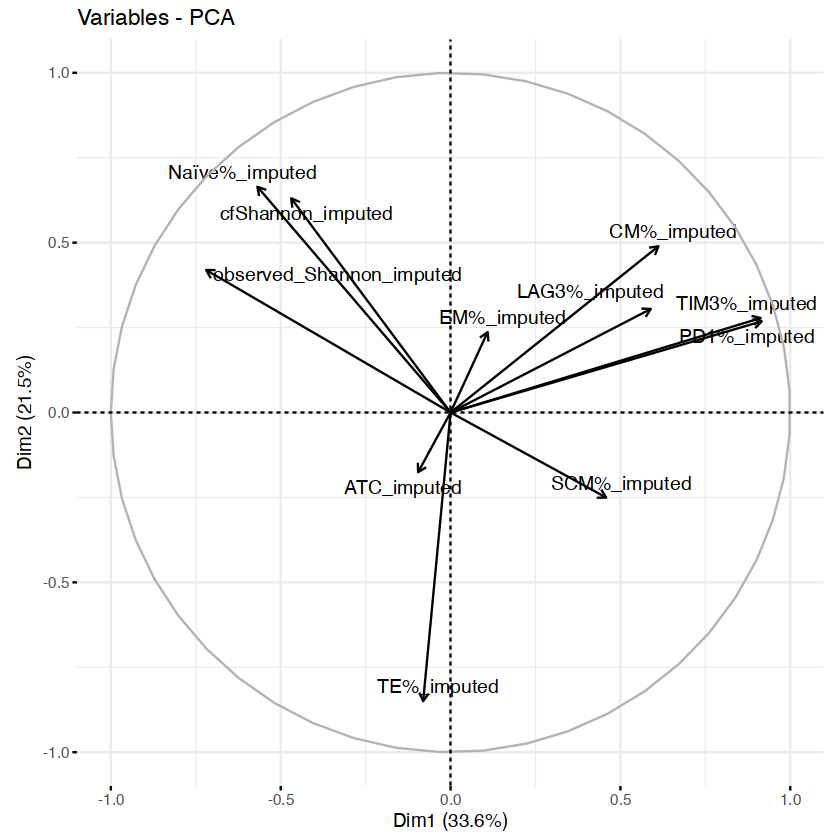

In [75]:
fviz_pca_var(mypca, repel = T)

In [76]:
p1 <- fviz_pca_ind(mypca,
     habillage = as.factor(pbmc_hla_v_j_gliph_rescomp$cancergroup),
    # remove labels
    label = "none",
    repel = F, addEllipses = FALSE, mean.point = FALSE
)

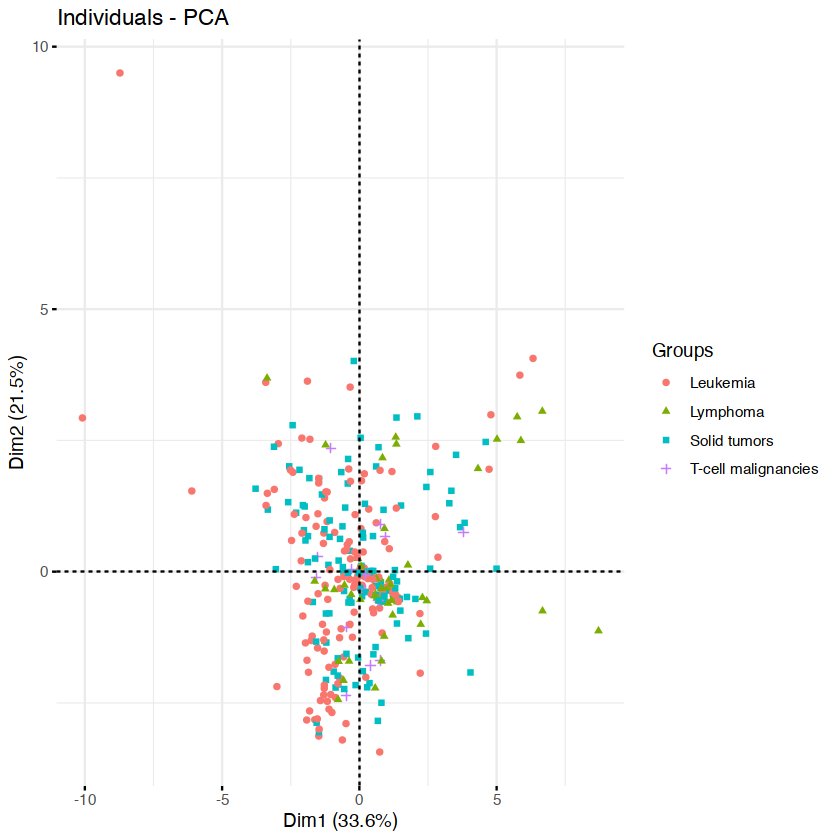

In [77]:
p1

In [78]:
rescomp <- pbmc_hla_v_j_gliph_rescomp#[ !is.na(pbmc_hla_v_j_gliph_rescomp$`CM%_imputed`), ]

In [79]:
head(rescomp)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,Naïve%_imputed,SCM%_imputed,CM%_imputed,EM%_imputed,TE%_imputed,PD1%_imputed,LAG3%_imputed,TIM3%_imputed,observed_Shannon_imputed,cfShannon_imputed
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,13.54575,9.663029,16.44255,5.701024,54.66353,24.63651,14.30055,24.67881,11.878,2.733345
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,33.24240,-15.837951,29.64994,17.918741,35.15985,19.47117,23.77311,19.75070,37.722,43.423000
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,19.41790,5.458693,17.43748,6.502780,51.21411,18.71027,13.40403,18.73311,81.753,8.671000
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,20.52749,9.970892,13.47580,3.720279,52.31436,20.17399,11.51695,20.25597,129.919,1.775000
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,29.13301,5.918039,13.44616,4.272620,47.25334,15.92697,11.00051,16.07903,223.747,7.888416
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,18.32906,9.242230,14.91303,4.723876,52.80595,21.46395,12.68138,21.53011,87.321,3.065000


In [80]:
myx <- res.pca$ind$coord
mydist <- as.matrix(dist(myx[, 1:2])) 

In [81]:
rescomp$Dim1 <- myx[,1][match( rescomp$sample_id, rownames(myx))]
rescomp$Dim2 <- myx[,2][match( rescomp$sample_id, rownames(myx))]

### SPiderplot

In [82]:
diff_Dim1 <- calculate_delta.fx(rescomp, "cycle", "Dim1")
diff_Dim2 <- calculate_delta.fx(rescomp, "cycle", "Dim2")

In [83]:
# diff_dim1_dim2 <- merge(diff_Dim1, diff_Dim2[,c("sample_id", "Difference")], by = "sample_id")

In [84]:
# p5 <- ggplot(diff_dim1_dim2, aes(x = Difference.x, y = Difference.y, 
# color = as.factor(Relapse) )) +
#     geom_point() +
#     # geom_text_repel(aes(label = Relapse), size = 3) +
#     geom_line(aes(group = Patient, color = as.factor(Relapse)) )+
#     myplot +
#     myaxis +
#     theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
#     # scale_color_manual(values = group_col) +
#     geom_hline(yintercept = 0, linetype = "dashed") +
#     geom_vline(xintercept = 0, linetype = "dashed") +
#     labs(x = "Change in Immune Checkpoint axis", y = "Change in Diversity axis")


In [85]:
# p5 + facet_wrap(~cancergroup)

### Get distances

In [86]:
myx <- res.pca$ind$coord
mydist <- as.matrix(dist(myx[, 1:2]))

In [87]:
head(myx)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
CHP_319_05,2.1326016,-0.7096627,0.1796151,-0.65282150,0.22993956
CHP_323_03,-0.3753029,5.7366412,6.0158690,-0.08515306,1.01506955
CHP_323_05,0.6746451,-0.0267239,1.0404103,0.74278065,0.33937710
CHP_324_05,0.8820754,-0.7212642,-0.6066990,-0.52811014,-0.05091541
CHP_328_04,-0.4869111,0.3541052,-0.2222884,-0.34009224,-0.13206303
CHP_328_05,1.2508161,-0.5969133,-0.1525691,-0.45504356,0.08203159


In [88]:
sample_df <- pbmc_hla_v_j_gliph %>%
    group_by(Patient) %>%
    # order cyclenum
    arrange(cyclenum) %>%
    ungroup()
pts <- names(which(table(sample_df$Patient) > 1))


In [89]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,NA,1
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,NA,1
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,0,0,0,0,2.874,1
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,0,0,0,1.890,1
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,0,0,0,0,NA,1
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,0,0,0,0,NA,1


In [90]:
sample_df$Dim1 <- myx[,1][match( sample_df$sample_id, rownames(myx))]
sample_df$Dim2 <- myx[,2][match( sample_df$sample_id, rownames(myx))]

In [91]:
sample_df$dist <- NA

In [92]:
for (i in pts) {
    tmp <- sample_df[sample_df$Patient == i, ]

    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df$dist[sample_df$Patient == i] <- tmp$dist

}


In [93]:
sample_df[ sample_df$Patient == "CHP_324",]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_324_04,CHP_324,X04,0,0,12,T-ALL,0,0,NA,...,NA,NA,NA,NA,NA,1.000,4,1.0359544,-0.8628254,NA
CHP_324_05,CHP_324,X05,0,0,12,T-ALL,0,0,NA,...,0,0,0,0,0,1.775,5,0.8820754,-0.7212642,0.2090893


In [94]:
allpts <- as.data.frame(table(sample_df$Patient), stringsAsFactors = F)

allpts$sumdist <- NA
allpts$meddist <- NA
allpts$samplecount <- NA

for (i in 1:nrow(allpts)) {
    tmp <- as.data.frame(sample_df[sample_df$Patient == allpts$Var1[i], ])
    # allpts$sumdist[i] <- sum(tmp[tmp$dist != 0, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[tmp$dist != 0, "dist"], na.rm = T)
    # count number of samples for meddist
    allpts$samplecount[i] <- nrow(tmp[!is.na(tmp$dist), ]) + 1
}
allpts$meddist_n <- allpts$meddist / allpts$samplecount
allpts_no0 <- allpts[allpts$Freq > 1, ]

mysample_df <- sample_df[sample_df$Patient %in% allpts_no0$Var1, ]
mypatients <- mysample_df[!duplicated(mysample_df$Patient), ]

mypatients$meddist_n <- allpts_no0$meddist_n[match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist <- allpts_no0$meddist[match(mypatients$Patient, allpts_no0$Var1)]


In [95]:
sample_df[ sample_df$Patient == "CHP_418",]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_418_01,CHP_418,X01,0.0,18.48,2,NB,0.0,0,NA,...,0,0,0,0,0,1.000,1,1.1631278,-0.8852423,NA
CHP_418_02,CHP_418,X02,1.4,0.00,2,NB,1.4,581,45,...,0,0,0,0,0,2.696,2,0.1890619,-2.6841995,2.0457398
CHP_418_03,CHP_418,X03,0.5,0.00,2,NB,0.5,4018,34,...,NA,NA,NA,NA,NA,NA,3,3.7556831,2.5930923,6.3695051
CHP_418_04,CHP_418,X04,0.6,0.00,2,NB,0.6,2295,4,...,NA,NA,NA,NA,NA,NA,4,0.9758509,-4.2703313,7.4050017
CHP_418_05,CHP_418,X05,1.2,NA,2,NB,1.2,2397,9,...,NA,NA,NA,NA,NA,NA,5,1.1393917,-3.9364870,0.3717494


In [96]:
table(mypatients$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     1     21      9      1      3      2      2      2      5      6      3 
    HD HR ALL     NB     OS  PMBCL    RMS SR ALL  T-ALL  WILMS 
     5      9      2      9      2      1      3      4      3 

### S plot

In [97]:
mypatients_df1 <- mypatients

In [98]:
dim(mypatients)

[1]   93 8836

In [99]:
# Add placeholders
mypatients <- rbind(NA, NA, NA, mypatients)
mypatients[1, "Disease_type"] <- "EMPTY1"
mypatients[2, "Disease_type"] <- "EMPTY2"
mypatients[3, "Disease_type"] <- "EMPTY3"
mypatients[1, "meddist_n"] <- -1
mypatients[2, "meddist_n"] <- -1
mypatients[3, "meddist_n"] <- -1
mypatients[1, "cancergroup"] <- "Lymphoma"
mypatients[2, "cancergroup"] <- "Solid tumors"
mypatients[3, "cancergroup"] <- "T-cell malignancies"

In [100]:
mymed <- median.cohorts.fx(mypatients, "meddist_n", "Disease_type")
# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- mypatients$cancergroup[match(mymed$group, mypatients$Disease_type)]

In [101]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [102]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
19,SR ALL,0.1042772,Leukemia
4,ALL,0.6666049,Leukemia
8,AML,1.3643697,Leukemia
11,HR ALL,1.9412409,Leukemia
6,CML,2.4660150,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
9,HD,0.4883533,Lymphoma
17,BLL,0.6429431,Lymphoma
20,PMBCL,0.9349142,Lymphoma


In [103]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
19,SR ALL,0.1042772,Leukemia
4,ALL,0.6666049,Leukemia
8,AML,1.3643697,Leukemia
11,HR ALL,1.9412409,Leukemia
6,CML,2.4660150,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
9,HD,0.4883533,Lymphoma
17,BLL,0.6429431,Lymphoma
20,PMBCL,0.9349142,Lymphoma


Sort df

In [104]:
sorted.df.lst <- sort.df.fx(mypatients, mymed, "meddist_n", "Disease_type")

Color dummy entries white

In [105]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [106]:
Sp <- Splot.fx(sorted.df.lst, "meddist_n", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [108]:
Sp1 <- Sp + ylim(c(0, 5)) + theme(plot.margin = unit(c(0, 0, 0,0), "cm"),
axis.text = element_text(size = 16, color = "black"), 
axis.title = element_text(size = 16)) + ylab("Dynamic Immunogenomic Score (DIS)")

In [109]:
pdf(paste0(plotpath, "TIS.pdf"), width = 7.5, height = 6)
cowplot::plot_grid(Sp1, labels = "C") 
dev.off()

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

Stats

In [110]:
tapply(mypatients_df1$meddist_n, mypatients_df1$Relapse, summary, na.rm = T)

$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.04376 0.50131 0.89476 1.02947 1.40542 3.72740       5 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1683  0.5579  0.9659  1.7055  2.7559  4.3871       1 


In [111]:
wilcox.test(mypatients_df1$meddist_n, mypatients_df1$Relapse)


	Wilcoxon rank sum test with continuity correction

data:  mypatients_df1$meddist_n and mypatients_df1$Relapse
W = 7275, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [112]:
rms::lrm(Relapse ~ meddist_n, data = mypatients, maxit = 100)

Frequencies of Missing Values Due to Each Variable
  Relapse meddist_n 
        3         6 

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist_n, data = mypatients, maxit = 100)


                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            87    LR chi2      5.20     R2       0.096    C       0.597    
 0             72    d.f.            1     R2(1,87) 0.047    Dxy     0.194    
 1             15    Pr(> chi2) 0.0226    R2(1,37.2)0.107    gamma   0.194    
max |deriv| 1e-10                          Brier    0.130    tau-a   0.056    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept -2.3539 0.4805 -4.90  <0.0001 
meddist_n  0.5945 0.2585  2.30  0.0214  


In [146]:
rms::lrm(Relapse ~ meddist_n*cancergroup, data = mypatients, maxit = 100) 

Frequencies of Missing Values Due to Each Variable
    Relapse   meddist_n cancergroup 
          3           6           0 

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist_n * cancergroup, data = mypatients, 
    maxit = 100)


                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            87    LR chi2     20.90     R2       0.355    C       0.801    
 0             72    d.f.            7     R2(7,87) 0.148    Dxy     0.602    
 1             15    Pr(> chi2) 0.0039    R2(7,37.2)0.312    gamma   0.602    
max |deriv| 5e-05                          Brier    0.104    tau-a   0.174    

                                            Coef       S.E.       Wald Z
Intercept                                      -2.9850     0.8255 -3.62 
meddist_n                                       0.8758     0.3375  2.59 
cancergroup=Lymphoma                           45.1233   248

In [114]:
lrmodel <- glm(Relapse ~ meddist_n*cancergroup, data = mypatients, family = "binomial")
mysum <- summary(lrmodel)
mysum
exp(confint.default(lrmodel, level = 0.95))
exp(mysum$coefficients[2, "Estimate"])

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Relapse ~ meddist_n * cancergroup, family = "binomial", 
    data = mypatients)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2981  -0.6055  -0.4165   0.0000   2.3468  

Coefficients:
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -2.985e+00  8.255e-01  -3.616 0.000299
meddist_n                                 8.758e-01  3.375e-01   2.595 0.009462
cancergroupLymphoma                       9.356e+01  1.924e+04   0.005 0.996120
cancergroupSolid tumors                   1.839e+00  1.256e+00   1.465 0.143047
cancergroupT-cell malignancies           -5.077e+03  7.461e+05  -0.007 0.994571
meddist_n:cancergroupLymphoma            -4.307e+02  8.768e+04  -0.005 0.996081
meddist_n:cancergroupSolid tumors        -1.377e+00  1.066e+00  -1.292 0.196459
meddist_n:cancergroupT-cell malignancies  5.276e+03  7.751e+05   0.007 0.994569
                                            
(Inte

,2.5 %,97.5 %
(Intercept),0.01002241,0.2548655
meddist_n,1.23897883,4.6519485
cancergroupLymphoma,0.00000000,Inf
cancergroupSolid tumors,0.53676113,73.7589567
cancergroupT-cell malignancies,0.00000000,Inf
meddist_n:cancergroupLymphoma,0.00000000,Inf
meddist_n:cancergroupSolid tumors,0.03119526,2.0393074
meddist_n:cancergroupT-cell malignancies,0.00000000,Inf


[1] 2.400764

#### Table S4

In [154]:
lrmodel <- glm(Relapse ~ meddist_n*cancergroup, data = mypatients, family = "binomial")
mysum_it <- summary(lrmodel)
mysum_it_coef <- mysum_it$coefficients

mysum_it_coef <- cbind(mysum_it_coef, exp(confint.default(lrmodel, level = 0.95)), exp(mysum_it$coefficients[, "Estimate"]) )

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [156]:
lrmodel <- glm(Relapse ~ meddist_n, data = mypatients, family = "binomial")
mysum_uni <- summary(lrmodel)
mysum_uni_coef <- mysum_uni$coefficients

mysum_uni_coef <- cbind(mysum_uni_coef, exp(confint.default(lrmodel, level = 0.95)), exp(mysum_uni$coefficients[, "Estimate"]) )

In [157]:
colnames(mysum_uni_coef) <- c("Estimate", "Std. Error", "z value", "Pr(>|z|)", "lower 95% CI", "upper 95% CI", "odds ratio")
rownames(mysum_uni_coef) <- gsub("meddist_n", "DIS", rownames(mysum_uni_coef) )

In [158]:
colnames(mysum_it_coef) <- c("Estimate", "Std. Error", "z value", "Pr(>|z|)", "lower 95% CI", "upper 95% CI", "odds ratio")
rownames(mysum_it_coef) <- gsub("meddist_n", "DIS", rownames(mysum_it_coef) )

In [168]:
library(openxlsx)

# Create a workbook
wb <- createWorkbook()
addWorksheet(wb, "TableS4")

writeData(wb, "TableS4", "Univariate logistic regression model", startRow = 1, startCol = 1)
writeData(wb, "TableS4", mysum_uni_coef[, c("Estimate", "odds ratio", "lower 95% CI", "upper 95% CI", "Std. Error", "z value", "Pr(>|z|)")], startRow = 2, startCol = 1,rowNames = TRUE)

writeData(wb, "TableS4", "Logistic regression model including cancergroup as an interaction term", startRow = 6, startCol = 1)
writeData(wb, "TableS4", mysum_it_coef[, c("Estimate", "odds ratio", "lower 95% CI", "upper 95% CI", "Std. Error", "z value", "Pr(>|z|)")], startRow = 7, startCol = 1,rowNames = TRUE)


# Save the workbook
saveWorkbook(wb, "~/OneDrive - UHN//Documents/Manuscripts/INTERCEPT/v1/TableS4.xlsx", overwrite = TRUE)

In [166]:
mysum_uni_coef

,Estimate,Std. Error,z value,Pr(>|z|),lower 95% CI,upper 95% CI,odds ratio
(Intercept),-2.3538596,0.4805465,-4.898298,9.667051e-07,0.03704161,0.2436541,0.09500179
DIS,0.5945104,0.2584721,2.300095,2.144281e-02,1.09189474,3.0074916,1.81214356


Forestplot

In [145]:
feat_lr_mat <- matrix(nrow = 1, ncol = 7)

colnames(feat_lr_mat) <- c("coef", "exp(coef)", "SE", "z", "Pr(>|z|)", "lower.95", "upper.95")

In [146]:
lrmodel <- glm(Relapse ~ meddist_n, data = mypatients[ mypatients$cancergroup == "Leukemia",], family = "binomial")
mysum <- summary(lrmodel)
myCI <- exp(confint.default(lrmodel, level = 0.95))

In [152]:
names(mysum)

[1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "na.action"      "deviance.resid"
[13] "coefficients"   "aliased"        "dispersion"     "df"            
[17] "cov.unscaled"   "cov.scaled"

In [157]:
feat_lr_mat

coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
NA,NA,NA,NA,NA,NA,NA


In [158]:
feat_lr_mat[1, "coef"] <- mysum$coefficients[2, "Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[1, "exp(coef)"] <- exp(mysum$coefficients[2, "Estimate"])
    feat_lr_mat[1, "SE"] <- mysum$coefficients[2, "Std. Error"]
    feat_lr_mat[1, "z"] <- mysum$coefficients[2, "z value"]
    feat_lr_mat[1, "Pr(>|z|)"] <- mysum$coefficients[2, "Pr(>|z|)"]
    # from myCI
    feat_lr_mat[1, "lower.95"] <- myCI[2, 1]
    feat_lr_mat[1, "upper.95"] <- myCI[2, 2]

In [159]:
feat_lr_mat

coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
0.8757868,2.400764,0.3375058,2.594879,0.009462422,1.238979,4.651948


In [161]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [162]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [165]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )

In [164]:
feat_lr_mat

coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,mean,lower,upper,OR,p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.8757868,2.400764,0.3375058,2.594879,0.009462422,1.238979,4.651948,2.400764,1.238979,4.651948,2.4,0.01


In [167]:
library(forestplot)

Loading required package: checkmate

Loading required package: abind



In [177]:
feat_lr_mat$Feature <- "TIS"

In [186]:
p2 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p),
    # clip = c(-0.5, 2.5),
    # boxsize = 0.2,
     vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value")

  )


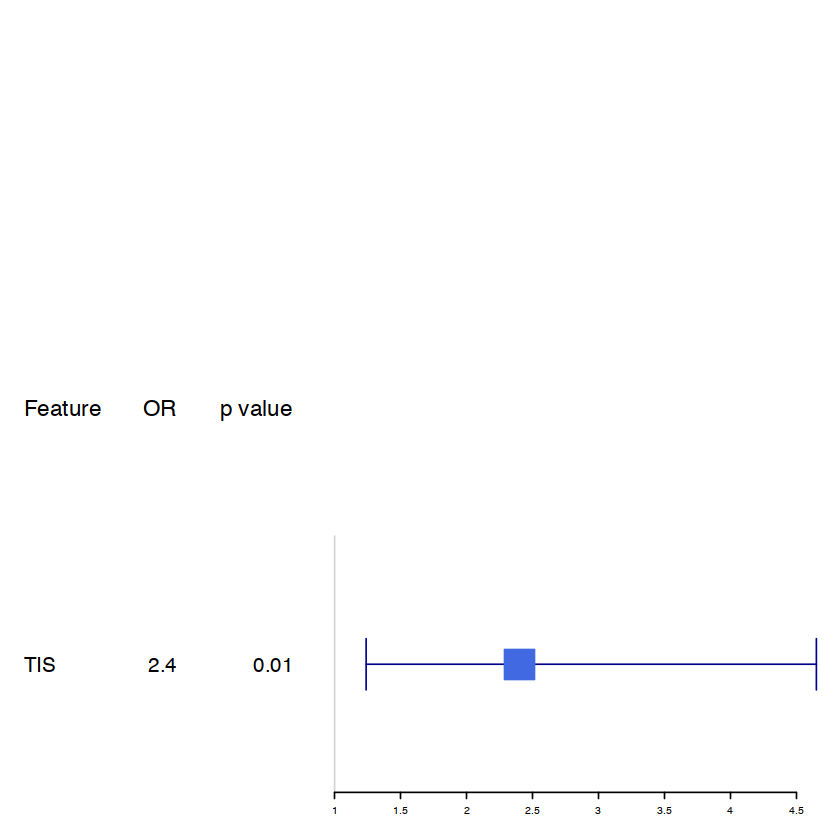

In [187]:
p2

In [188]:
pdf(paste0(plotpath, "forestplot_tis_ORleukemia.pdf"), width=5, height=5)
p2
dev.off()

pdf 
  2

In [135]:
lrmodel <- glm(Relapse ~ meddist_n, data = mypatients_df1, family = "binomial")
mysum <- summary(lrmodel)
mysum
exp(confint.default(lrmodel, level = 0.95))
exp(mysum$coefficients[2, "Estimate"])


Call:
glm(formula = Relapse ~ meddist_n, family = "binomial", data = mypatients_df1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1195  -0.5934  -0.5143  -0.4520   2.1696  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.3539     0.4805  -4.898 9.67e-07 ***
meddist_n     0.5945     0.2585   2.300   0.0214 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 79.987  on 86  degrees of freedom
Residual deviance: 74.789  on 85  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 78.789

Number of Fisher Scoring iterations: 4


,2.5 %,97.5 %
(Intercept),0.03704161,0.2436541
meddist_n,1.09189474,3.0074916


[1] 1.812144

In [136]:
head(mypatients_df1)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,NA,1,-0.8626402,-2.3482363,NA,1.2862241,6.431120
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,2.874,1,-0.8623382,-0.6462504,NA,0.9006916,1.801383
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,1.890,1,-0.9518104,-4.8359061,NA,4.1855440,8.371088
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,NA,1,-2.5951609,-1.0673703,NA,0.4766453,2.383226
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,4.170,1,-1.3514412,-3.6525629,NA,NA,NA
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,0,0,6.906,1,-1.0641749,-0.5239035,NA,1.0213805,5.106902


In [137]:
myfit <- lme4::glmer(Relapse ~ meddist_n + cancergroup + (1 | Patient), data = mypatients_df1, family = "binomial")

boundary (singular) fit: see help('isSingular')



In [138]:
summary(myfit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Relapse ~ meddist_n + cancergroup + (1 | Patient)
   Data: mypatients_df1

     AIC      BIC   logLik deviance df.resid 
    85.5    100.3    -36.7     73.5       81 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9415 -0.4566 -0.3681 -0.2737  4.5774 

Random effects:
 Groups  Name        Variance Std.Dev.
 Patient (Intercept) 0        0       
Number of obs: 87, groups:  Patient, 87

Fixed effects:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.5191     0.6986  -3.606 0.000311 ***
meddist_n                        0.6435     0.2866   2.245 0.024746 *  
cancergroupLymphoma             -0.6315     1.1521  -0.548 0.583593    
cancergroupSolid tumors          0.3369     0.7042   0.478 0.632355    
cancergroupT-cell malignancies   0.9735     1.2831   0.759 0.448047    
---
Signif. code

Case reports

In [139]:
dimplot_pt <- function(df, pt,  myalpha) {
   p1 <- ggplot(data = df, aes(x = Dim1, y = Dim2 )) +
      geom_point(aes(color = cancergroup, alpha = eval(parse(text = myalpha))), size = 3) +
      geom_path(
         data = df[df$Patient == pt, ], aes(group = Patient),
         arrow = arrow(length = unit(0.30, "cm"), ends = "last", type = "closed")
      ) +
      myplot +
      myaxis +
      theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
      scale_color_manual(values = group_col) +
      geom_hline(yintercept = 0, linetype = "dashed") +
      geom_vline(xintercept = 0, linetype = "dashed") 

   return(p1)
}


In [140]:
for (i in mypatients$Patient[mypatients$Relapse == 1]) {
    sample_df$alpha <- NA
    sample_df$alpha[sample_df$Patient == i] <- 1
    sample_df$alpha[sample_df$Patient != i] <- 0.1
    myp <- dimplot_pt(sample_df, i, "alpha") +  scale_alpha_continuous(range = c(0.3, 1)) +
        ggtitle(paste0(
           " Relapsed ", mypatients$Disease_type[mypatients$Patient == i]," (", i, ")", "\n",
            "TIS = ", round(mypatients$meddist_n[mypatients$Patient == i],2)
        )) + labs(x = "Inverted Immune Checkpoint axis\n(PC1 = 33.6%)", y = "Diversity axis\n(PC2 = 21.5%)")
    pdf(paste0(plotpath, "PCAplot_imputed_", i, "relapsed.pdf"), width = 5, height = 5)
    print(myp + theme(legend.position = "none") )
    dev.off()
}


Warning message:
“Removed 354 rows containing missing values or values outside the scale range
(`geom_path()`).”
Warning message:
“Removed 354 rows containing missing values or values outside the scale range
(`geom_path()`).”
Warning message:
“Removed 354 rows containing missing values or values outside the scale range
(`geom_path()`).”


In [141]:
for (i in mypatients$Patient[mypatients$Relapse == 0]) {
    sample_df$alpha <- NA
    sample_df$alpha[sample_df$Patient == i] <- 1
    sample_df$alpha[sample_df$Patient != i] <- 0.1
    myp <- dimplot_pt(sample_df, i,  "alpha") + scale_alpha_continuous(range = c(0.3, 1)) +
        ggtitle(paste0(
            " In remission ", mypatients$Disease_type[mypatients$Patient == i], " (", i, ")", "\n",
            "TIS = ", round(mypatients$meddist_n[mypatients$Patient == i],2 )
        )) + labs(x = "Inverted Immune Checkpoint axis\n(PC1 = 33.6%)", y = "Diversity axis\n(PC2 = 21.5%)")
    pdf(paste0(plotpath, "PCAplot_imputed_", i, "remission.pdf"), width = 5, height = 5)
    print(myp + theme(legend.position = "none"))
    dev.off()
}


Warning message:
“Removed 354 rows containing missing values or values outside the scale range
(`geom_path()`).”
Warning message:
“Removed 354 rows containing missing values or values outside the scale range
(`geom_path()`).”
Warning message:
“Removed 354 rows containing missing values or values outside the scale range
(`geom_path()`).”


In [142]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,alpha
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,NA,1,-3.8906054,2.7278633,NA,0.1
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,NA,1,-0.8626402,-2.3482363,NA,0.1
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,2.874,1,-0.8623382,-0.6462504,NA,0.1
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,1.890,1,-0.9518104,-4.8359061,NA,0.1
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,NA,1,-2.5951609,-1.0673703,NA,0.1
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,NA,1,-1.4952107,-3.8530336,NA,0.1


In [143]:
list_p <-  vector('list', 4)
    i = 1
for (pt in c("CHP_411", "CHP_402", "CHP_399", "CHP_323")) {

    if(sample_df$Relapse[sample_df$Patient == pt][1] == 1) {
        relrem <- "Relapsed - "
    } else {
        relrem <- "In remission - "
    }
    sample_df$alpha <- NA
    sample_df$alpha[sample_df$Patient == pt] <- 1
    sample_df$alpha[sample_df$Patient != pt] <- 0.1
    list_p[[i]] <- dimplot_pt(sample_df, pt,  "alpha") + scale_alpha_continuous(range = c(0.3, 1)) +
        theme(legend.position = "none") +
        ggtitle(paste0(
            relrem, mypatients$Disease_type[mypatients$Patient == pt], " (", pt, ")", "\n",
            "TIS = ", round(mypatients$meddist_n[mypatients$Patient == pt],2 )
        )) + labs(x = "Inverted Immune Checkpoint axis\n(PC1 = 33.6%)", y = "Diversity axis\n(PC2 = 21.5%)")
    i = i + 1
}

In [ ]:
    pdf(paste0(plotpath, "PCAplot_imputed_402_411_399_323.pdf"), width = 10, height = 10)
    cowplot::plot_grid(list_p[[1]], list_p[[2]], list_p[[3]], list_p[[4]], labels = "D")
    dev.off()

In [ ]:
list_p <-  vector('list', 4)
    i = 1
for (pt in c("CHP_359", "CHP_342", "CHP_369", "CHP_357")) {

    if(sample_df$Relapse[sample_df$Patient == pt][1] == 1) {
        relrem <- "Relapsed - "
    } else {
        relrem <- "In remission - "
    }
    sample_df$alpha <- NA
    sample_df$alpha[sample_df$Patient == pt] <- 1
    sample_df$alpha[sample_df$Patient != pt] <- 0.1
    list_p[[i]] <- dimplot_pt(sample_df, pt,  "alpha") + scale_alpha_continuous(range = c(0.3, 1)) +
        theme(legend.position = "none") +
        ggtitle(paste0(
            relrem, mypatients$Disease_type[mypatients$Patient == pt], " (", pt, ")", "\n",
            "TIS = ", round(mypatients$meddist_n[mypatients$Patient == pt],2 )
        )) + labs(x = "Inverted Immune Checkpoint axis\n(PC1 = 33.6%)", y = "Diversity axis\n(PC2 = 21.5%)")
    i = i + 1
}

In [ ]:
    pdf(paste0(plotpath, "PCAplot_imputed_359_342_369_357.pdf"), width = 10, height = 10)
    cowplot::plot_grid(list_p[[1]], list_p[[2]], list_p[[3]], list_p[[4]], labels = "E")
    dev.off()